<a href="https://colab.research.google.com/github/Melikakmm/CLPBgroup17/blob/main/ASSIGNMENT_1/Question_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
import tensorflow as tf
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

%run /content/nonlinear_function.py

# training data
perc_train = 0.8
!mkdir DATA

mkdir: cannot create directory ‘DATA’: File exists


In [ ]:
N = 4000
TYPE=1
B = 100


np.random.seed(12345)
print(np.random.randint(0,10),np.random.randint(0,10),np.random.randint(0,10))

x,y = (np.random.random((N,2))-0.5)*B, np.zeros(N)


np.savetxt(filename("data",TYPE),x)
np.savetxt(filename("labels",TYPE),y,fmt="%d")

2 5 1


2 5 1
2
Train: 3200 	 Validation: 800
reducedX4_Train: 800 	 reducedX4_Validation: 200
reducedX10_Train: 320 	 reducedX10_Validation: 80
increasedX2Train: 6400 	 increasedX2Validation: 1600
increasedX4Train: 12800 	increasedX4Validation: 3200


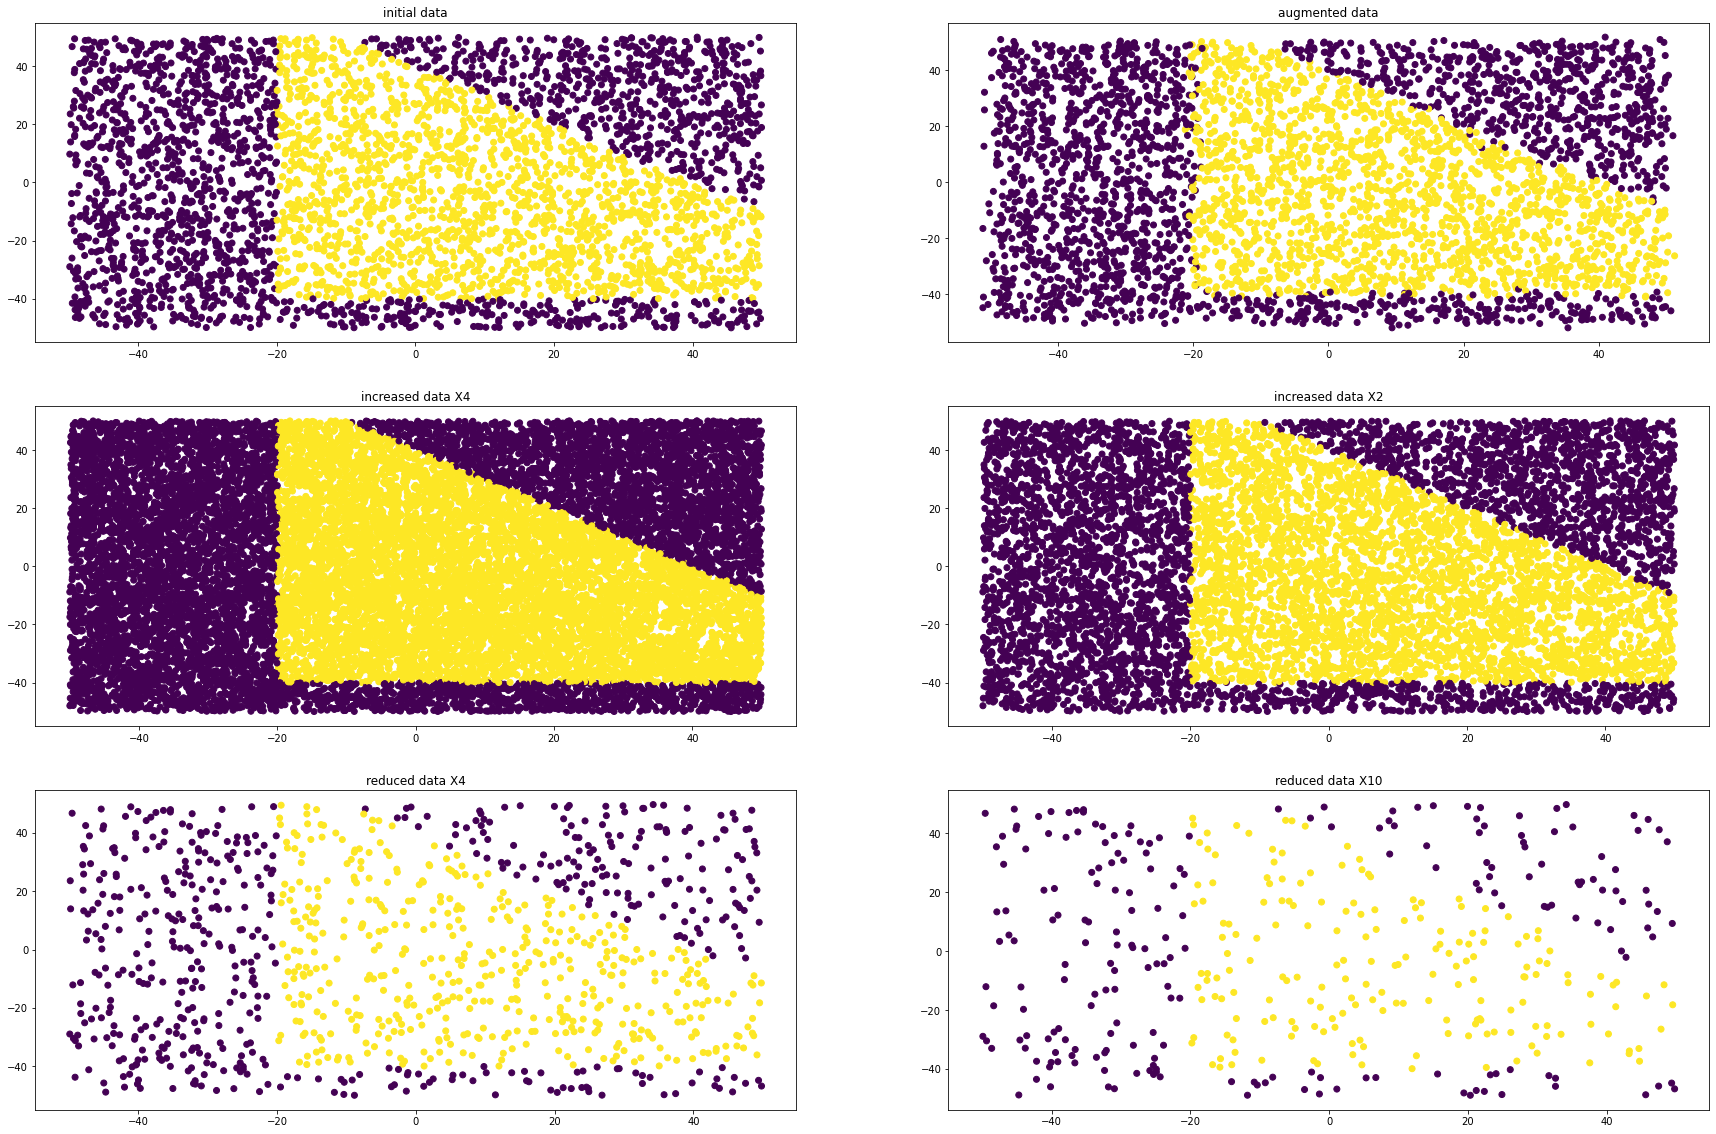

In [ ]:
N = 4000
TYPE=1
B = 100

# random seed for reproducibility
np.random.seed(12345)
print(np.random.randint(0,10),np.random.randint(0,10),np.random.randint(0,10))

x,y = (np.random.random((N,2))-0.5)*B, np.zeros(N)
for i in range(N):
    # label data according to a nonlinear function "f"
    y[i] = f(x[i],TYPE)
        

np.savetxt(filename("data",TYPE),x)
np.savetxt(filename("labels",TYPE),y,fmt="%d")


x = np.loadtxt(filename("data",TYPE), delimiter=' ')
y = np.loadtxt(filename("labels",TYPE), delimiter=' ')
N = len(x)


L = len(x[0])
print(L)



N_train = int(perc_train * N)


(x_train, y_train) = (x[0:N_train],y[0:N_train])
(x_valid, y_valid) = (x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))
#-------------------------------------------------------------------------------
#reduce X4
red_x_4 = np.loadtxt('/content/reducedx4_data-for-DNN-1.dat')
red_y_4 = np.loadtxt('/content/reducedx4_labels-for-DNN-1.dat')
red_N_4 = len(red_x_4)
red_L_4 = len(red_x_4[0])
#number of samples
red_m_training4 = int(perc_train * red_N_4 )
#spliting
(x_train_red4, y_train_red4) = (red_x_4[0:red_m_training4],red_y_4[0:red_m_training4])
(x_valid_red4, y_valid_red4) = (red_x_4[red_m_training4:red_N_4],red_y_4[red_m_training4:red_N_4])
print("reducedX4_Train:",len(x_train_red4),"\t reducedX4_Validation:",len(x_valid_red4))




#-------------------------------------------------------------------------------
#reduce X10
red_x_10 = np.loadtxt('/content/reducedx10_data-for-DNN-1.dat')
red_y_10 = np.loadtxt('/content/reducedx10_labels-for-DNN-1.dat')
red_N_10 = len(red_x_10)
red_L_10 = len(red_x_10[0])
#number of samples
red_m_training10 = int(0.8 * red_N_10 )
#spliting
(x_train_red10, y_train_red10) = (red_x_10[0:red_m_training10],red_y_10[0:red_m_training10])
(x_valid_red10, y_valid_red10) = (red_x_10[red_m_training10:red_N_10],red_y_10[red_m_training10:red_N_10])
print("reducedX10_Train:",len(x_train_red10),"\t reducedX10_Validation:",len(x_valid_red10))



#-------------------------------------------------------------------------------

#increase X2

inc_x_2= np.loadtxt('/content/increasedx2_data-for-DNN-1.dat')
inc_y_2 = np.loadtxt('/content/increasedx2_labels-for-DNN-1.dat')
#number of samples
inc_N_2 = len(inc_x_2)
#splitting
inc_m_training2= int(perc_train * inc_N_2)
(x_train_inc2, y_train_inc2) = (inc_x_2[0:inc_m_training2],inc_y_2[0:inc_m_training2])
(x_valid_inc2, y_valid_inc2) = (inc_x_2[inc_m_training2:inc_N_2 ],inc_y_2[inc_m_training2: inc_N_2])
print("increasedX2Train:",len(x_train_inc2),"\t increasedX2Validation:",len(x_valid_inc2))



#-------------------------------------------------------------------------------

#increaseX4

inc_x_4= np.loadtxt('/content/increasedx4_data-for-DNN-1.dat')
inc_y_4 = np.loadtxt('/content/increasedx4_labels-for-DNN-1.dat')
inc_N_4 = len(inc_x_4)
#splitting
inc_m_training4= int(perc_train * inc_N_4)
(x_train_inc4, y_train_inc4) = (inc_x_4[0:inc_m_training4],inc_y_4[0:inc_m_training4])
(x_valid_inc4, y_valid_inc4) = (inc_x_4[inc_m_training4:inc_N_4 ],inc_y_4[inc_m_training4: inc_N_4])
print("increasedX4Train:",len(x_train_inc4),"\tincreasedX4Validation:",len(x_valid_inc4))




#-------------------------------------------------------------------------------

#augment
#restart your kernel when you want to run

def augment(input, in_n):
  x_train_shift = np.copy(input) + np.random.randn(3200, 2)
  return x_train_shift
      
x_train_shift = augment(x_train, len(x_train))
#rescaling
def Rescale(variable):
    variable = (variable-variable.mean())/np.sqrt(variable.var())
    return variable


x_shift = np.concatenate((x_train_shift, x_valid), axis = 0)







#-----------------------------------------------------------------------------
#rescaling:

def Rescale2(xvariable, yvariable):
    xvariable = (xvariable-xvariable.mean())/np.sqrt(xvariable.var())
    yvariable = (yvariable-yvariable.mean())/np.sqrt(yvariable.var())
    return xvariable, yvariable

Rescale2(x_train, y_train)
Rescale2(x_valid, y_valid)
Rescale2(x_train_red4, y_train_red4)
Rescale2(x_valid_red4, y_valid_red4)
Rescale2(x_train_red10, y_train_red10)
Rescale2(x_valid_red10, y_valid_red10)
Rescale2(x_train_inc2, y_train_inc2)
Rescale2(x_valid_inc2, y_valid_inc2)
Rescale2(x_train_inc4, y_train_inc4)
Rescale2(x_valid_inc4, y_valid_inc4)





fig, AX = plt.subplots(3, 2, figsize = (30, 20))
AX[0, 0].scatter(x[:, 0], x[:, 1], c = y)
AX[0, 0].set_title('initial data')
AX[0, 1].scatter(x_shift[:, 0], x_shift[:, 1], c = y)
AX[0, 1].set_title('augmented data')
AX[1, 0].scatter(inc_x_4[:, 0],inc_x_4[:,1], c = inc_y_4)
AX[1, 0].set_title('increased data X4')
AX[1, 1].scatter(inc_x_2[:, 0], inc_x_2[:, 1], c = inc_y_2)
AX[1, 1].set_title('increased data X2')
AX[2, 0].scatter(red_x_4[:, 0], red_x_4[:, 1], c = red_y_4)
AX[2, 0].set_title('reduced data X4')
AX[2, 1].scatter(red_x_10[:, 0], red_x_10[:, 1], c = red_y_10)
AX[2, 1].set_title('reduced data X10')

plt.show()

In [ ]:

def create_model(CASE = 1, optimizer = "adam", dropout = 0.2, hidden_layers = 2,
                 activation_hidden_layers = 'relu', number_of_nodes = 20):
    
    if CASE == 1 :
        model = Sequential()
        model.add(Dense(L,input_shape=(L,),activation = 'relu',kernel_initializer='glorot_uniform'))
        for i in range(hidden_layers):
            model.add(Dense(number_of_nodes, activation=activation_hidden_layers))
        model.add(Dropout(dropout))
        model.add(Dense(1,activation='sigmoid'))

    if CASE == 2 :
        model = Sequential()
        model.add(Dense(L, input_shape = (L,),activation = 'sigmoid'))
        model.add(Dense(3, activation = 'sigmoid'))
        model.add(Dense(1, activation = 'sigmoid'))

    model.compile(loss= 'binary_crossentropy',
                  optimizer = optimizer,
                  metrics = ['accuracy'])
    
    model.save_weights('initial_weights.txt')
    
    return model


model  = create_model(CASE = 1, optimizer = "adam",dropout = 0.2,hidden_layers = 2,
                      activation_hidden_layers = 'relu', number_of_nodes = 20)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 20)                60        
                                                                 
 dense_2 (Dense)             (None, 20)                420       
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 507
Trainable params: 507
Non-trainable params: 0
_________________________________________________________________


In [ ]:
nepoch = 400

model.load_weights('initial_weights.txt')
fit_initial = model.fit(x_train, y_train,
               epochs = nepoch, batch_size = 50,
               validation_data=(x_valid,y_valid),verbose=0)




In [ ]:
model.load_weights('initial_weights.txt')
fit_red4 = model.fit(x_train_red4, y_train_red4,
               epochs = nepoch, batch_size = 50,
               validation_data=(x_valid_red4,y_valid_red4),verbose=0)


In [ ]:
model.load_weights('initial_weights.txt')
fit_red10 = model.fit(x_train_red10, y_train_red10,
               epochs = nepoch, batch_size = 50,
               validation_data=(x_valid_red10,y_valid_red10),verbose=0)

In [ ]:
model.load_weights('initial_weights.txt')
fit_inc2 = model.fit(x_train_inc2, y_train_inc2,
               epochs = nepoch, batch_size = 50,
               validation_data=(x_valid_inc2,y_valid_inc2),verbose=0)

In [ ]:
model.load_weights('initial_weights.txt')
fit_inc4 = model.fit(x_train_inc4, y_train_inc4,
               epochs = nepoch, batch_size = 50,
               validation_data=(x_valid_inc4,y_valid_inc4),verbose=0)

In [ ]:
model.load_weights('initial_weights.txt')
fit_aug = model.fit(x_train_shift, y_train,
               epochs = nepoch, batch_size = 50,
               validation_data=(x_valid,y_valid),verbose=0)

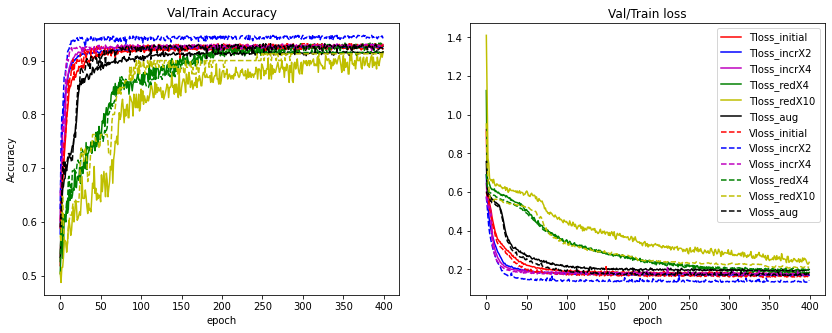

In [ ]:
fig,AX=plt.subplots(1, 2,figsize=(14, 5))
ax=AX[0]
ax.plot(fit_initial.history['accuracy'],'r',label="TAcc_initial")
ax.plot(fit_inc2.history['accuracy'],'b',label="TAcc_incrX2")
ax.plot(fit_inc4.history['accuracy'],'m',label="TAcc_incrX4")
ax.plot(fit_red4.history['accuracy'],'g',label="TAcc_redX4")
ax.plot(fit_red10.history['accuracy'],'y',label="TAcc_redX10")
ax.plot(fit_aug.history['accuracy'],'k',label="TAcc_augmented")
ax.plot(fit_initial.history['val_accuracy'],'--r',label="VAcc_initial")
ax.plot(fit_inc2.history['val_accuracy'],'--b',label="VAcc_incrX2")
ax.plot(fit_inc4.history['val_accuracy'],'--m',label="VAcc_incrX4")
ax.plot(fit_red4.history['val_accuracy'],'--g',label="vAcc_redX4")
ax.plot(fit_red10.history['val_accuracy'],'--y',label="VAcc_redX10")
ax.plot(fit_aug.history['val_accuracy'],'--k',label="VAcc_aug")
ax.set_title('Val/Train Accuracy')
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")


ax=AX[1]
ax.plot(fit_initial.history['loss'],'r',label="Tloss_initial")
ax.plot(fit_inc2.history['loss'],'b',label="Tloss_incrX2")
ax.plot(fit_inc4.history['loss'],'m',label="Tloss_incrX4")
ax.plot(fit_red4.history['loss'],'g',label="Tloss_redX4")
ax.plot(fit_red10.history['loss'],'y',label="Tloss_redX10")
ax.plot(fit_aug.history['loss'],'k',label="Tloss_aug")
ax.plot(fit_initial.history['val_loss'],'--r',label="Vloss_initial")
ax.plot(fit_inc2.history['val_loss'],'--b',label="Vloss_incrX2")
ax.plot(fit_inc4.history['val_loss'],'--m', label="Vloss_incrX4")
ax.plot(fit_red4.history['val_loss'],'--g',label="Vloss_redX4")
ax.plot(fit_red10.history['val_loss'],'--y',label="Vloss_redX10")
ax.plot(fit_aug.history['val_loss'],'--k',label="Vloss_aug")
ax.set_title('Val/Train loss')
ax.set_xlabel('epoch')
plt.legend(loc = 'best')


plt.show()
